<a href="https://colab.research.google.com/github/sydoky/Transfer-Learning-with-Tensorflow-Fine-Tuning/blob/main/Transfer_Learning_with_Tensorflow_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data,walk_through_dir


--2022-06-30 14:35:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-30 14:35:41 (58.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")


--2022-06-30 14:35:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  95.9MB/s    in 1.7s    

2022-06-30 14:35:48 (95.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
#walk through 10 percent data directory and list number of files

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [4]:
#Create training and test directories
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [5]:
#Create data inputs /// Preprocessing
import tensorflow as tf
IMG_SIZE=(224,224) #define image size
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=32) #train data

test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          )    #test data                                                                      

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
#those below are paramters 
#directory is the file path of the target directory we are loading images
#image size is the target size we are going to load it
#batch size is the the size of images we are going to load which is 32 images. 

train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [7]:
# (TensorSpec(shape=(None, 224, 224, 3)
#Tensor specification converting images into numbers 
#None is the shape
#224, 224 height and width
#3 is rgb color red, green and blue. 

In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
#Create base model with tf.keras api 

base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze our base_model(prelearned pattern remain)
base_model.trainable=False

#Create inputs into the base Model
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=base_model(inputs)

#Check data shape after passing it to base model
print("Shape after base model {}".format(x.shape))

#Average pool the outputs of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print("After GlobalAveragePooling2D {}",format(x.shape))

#Create the output activation layer
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)



#Combine the inputs with the outputs intoa model

model_0=tf.keras.Model(inputs,outputs)

#Compile the Model

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_10_percent=model_0.fit(train_data_10_percent,
                               epochs=10,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data_10_percent,
                               validation_steps=int(.25*len(test_data_10_percent)),
                               callbacks=[create_tensorboard_callback("transfer_learning","10_percent")]
                               )

16719872/16705208 [==============================] - 0s 0us/step
Shape after base model (None, 7, 7, 1280)
After GlobalAveragePooling2D {} (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent/20220630-143606
Epoch 1/10
24/24 [==============================] - 93s 3s/step - loss: 1.8560 - accuracy: 0.4400 - val_loss: 1.3579 - val_accuracy: 0.6859
Epoch 2/10
24/24 [==============================] - 68s 3s/step - loss: 1.1213 - accuracy: 0.7493 - val_loss: 0.9212 - val_accuracy: 0.7911
Epoch 3/10
24/24 [==============================] - 78s 3s/step - loss: 0.8301 - accuracy: 0.8053 - val_loss: 0.7837 - val_accuracy: 0.8059
Epoch 4/10
24/24 [==============================] - 78s 3s/step - loss: 0.6825 - accuracy: 0.8360 - val_loss: 0.6854 - val_accuracy: 0.8141
Epoch 5/10
24/24 [==============================] - 78s 3s/step - loss: 0.5969 - accuracy: 0.8600 - val_loss: 0.6441 - val_accuracy: 0.8240
Epoch 6/10
24/24 [==============================] - 68s 3s/step - loss

In [10]:
#check layers in our base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [11]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

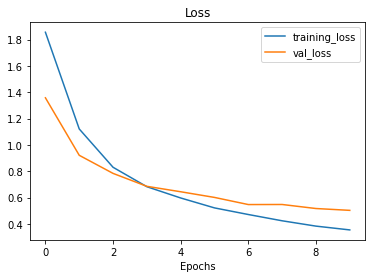

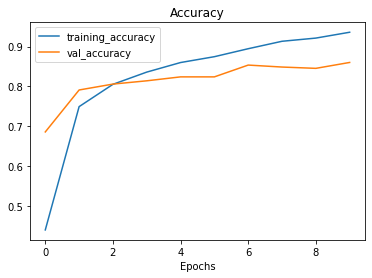

In [12]:
#check out our model's training curves
plot_loss_curves(history_10_percent)

# **Getting a feature vector from a trained model**

In [13]:
#define input tensor shape 
input_shape=(1,4,4,3)
#1 is the number of frame(4D), 4 height, 4 width, 3 color

#Create a Random tesnor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)

print("Random input Tensor {}".format(input_tensor))

global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print("2D global average pooled random tensor {}".format(global_average_pooled_tensor))

#check the shapes of different tensors 

print("Shape of input tensor: {}".format(input_tensor.shape))
print("Shape of 2D global averaged pooled input tensor: {}".format(global_average_pooled_tensor.shape))


Random input Tensor [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]
2D global average pooled random tensor [[-0.09368646 -0.45840445 -0.28855976]]
Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [14]:
tf.reduce_mean(input_tensor,axis=[1,2]) #average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

# **The difference between Feature Extraction and Fine Tuning is:More layers of pre trained model get unfrozen and tuned on custom data.The Fine Tuning usually takes more data than feature extraction to be effective**


In [15]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 

unzip_data("10_food_classes_1_percent.zip")


--2022-06-30 14:50:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   126MB/s    in 1.0s    

2022-06-30 14:50:08 (126 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [16]:
#create train and test dirs
train_dir_1_percent="10_food_classes_1_percent/train/"
test_dir="10_food_classes_1_percent/test/"

In [17]:
#walk trhough 1 percent data derecotry and list number of files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There a

In [18]:
#Load the data 
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode="categorical",
                                                                         batch_size=32,
                                                                         image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                        label_mode="categorical",
                                                                         batch_size=32,
                                                                         image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# **#Data Augmentation**

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Create a data Augmentation stage with horizontal flipping, rotation, zooms

data_augmentation=keras.Sequential([
                                    preprocessing.RandomFlip("horizontal"),
                                    preprocessing.RandomRotation(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomWidth(0.2),
                                    preprocessing.RandomHeight(0.2)],name="data_augmentation")

(-0.5, 511.5, 383.5, -0.5)

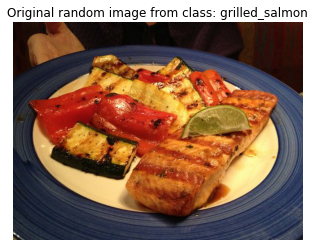

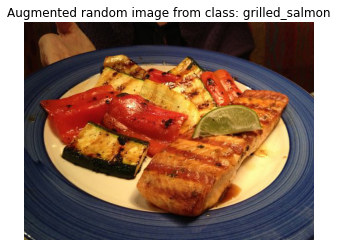

In [20]:
#View Random Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

target_class=random.choice(train_data_1_percent.class_names) #Choose a Random class

target_dir="10_food_classes_1_percent/train/"+target_class #Create the target directory

random_image=random.choice(os.listdir(target_dir)) #Choose a random image from the target directory

random_image_path=target_dir+"/"+random_image #Create The Random choosen image path

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title("Original random image from class: {}".format(target_class))
plt.axis(False) #Turn of the axes

#Augmented The Image

augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) #Require normalization after augmentation
plt.title("Augmented random image from class: {}".format(target_class))
plt.axis(False)





# **Model1: Feature Extraction Transfer Learning on 1% of the data with data augmentation**

In [21]:
#Setup input shape and base model,Freezing the base model layers
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

#Create Input Layer
inputs=layers.Input(shape=input_shape,name="input_layer")

#Add in data augmentation Sequential model as a layer

x=data_augmentation(inputs)

#Give base_model inputs (after augmentation) and don't train it

x=base_model(x,training=False)

#Pool output Features of base model

x=layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#Put a Dense layer on as the Output

outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

#Make a model with inputs and outputs
model_1=keras.Model(inputs,outputs)

#Compile The Model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1_percent=model_1.fit(train_data_1_percent,
                               epochs=10,
                               steps_per_epoch=len(train_data_1_percent),
                               validation_data=test_data,
                               validation_steps=int(.25*len(test_data)),
                               callbacks=[create_tensorboard_callback("transfer_learning","1_percent_data_aug")])






Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220630-145013
Epoch 1/10
3/3 [==============================] - 42s 17s/step - loss: 2.4327 - accuracy: 0.0857 - val_loss: 2.2163 - val_accuracy: 0.2007
Epoch 2/10
3/3 [==============================] - 33s 16s/step - loss: 2.1285 - accuracy: 0.2857 - val_loss: 2.1025 - val_accuracy: 0.2648
Epoch 3/10
3/3 [==============================] - 44s 21s/step - loss: 1.9890 - accuracy: 0.4143 - val_loss: 1.9987 - val_accuracy: 0.3355
Epoch 4/10
3/3 [==============================] - 45s 22s/step - loss: 1.8048 - accuracy: 0.5286 - val_loss: 1.8983 - val_accuracy: 0.4046
Epoch 5/10
3/3 [==============================] - 45s 21s/step - loss: 1.6372 - accuracy: 0.7143 - val_loss: 1.8239 - val_accuracy: 0.4539
Epoch 6/10
3/3 [==============================] - 46s 22s/step - loss: 1.4798 - accuracy: 0.7429 - val_loss: 1.7423 - val_accuracy: 0.4984
Epoch 7/10
3/3 [==============================] - 34s 16s/step - loss: 1.3600 - 

# **Above this we are fitting **

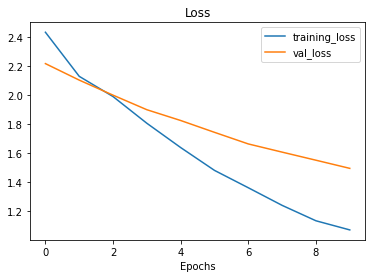

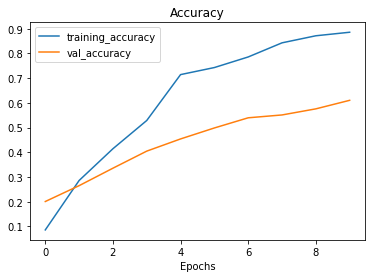

In [22]:
#We are going to check how our model performs 
plot_loss_curves(history_1_percent)

# **Model 2: Feature extraction tranfer learning with 10% data & data augmentation **

In [23]:
train_dir_10_percent="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [24]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                         label_mode="categorical",
                                                                         batch_size=32,
                                                                         image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.


In [25]:
#Create a function model with Data Augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


#Build Data Augmentation Layer
data_augmentation=Sequential([
                              preprocessing.RandomFlip("horizontal"),
                              preprocessing.RandomHeight(0.2),
                              preprocessing.RandomWidth(0.2),
                              preprocessing.RandomZoom(0.2),
                              preprocessing.RandomRotation(0.2)
],name="data_augmentation")
#Setup the input shape to our model

input_shape=(224,224,3)

#Create a frozen base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#Create input and Output layers
inputs=layers.Input(shape=input_shape,name="input_layer")#Create input layer
x=data_augmentation(inputs)#augment our training images
x=base_model(x,training=False) #pass augmented images to base_model
x=layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2=tf.keras.Model(inputs,outputs)

#Compile 
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])







/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Create, compile, and fitting**

# Creating A ModelCheckPoint Callback:ModelCheck Point callback gives you the ability to save the model as a whoie SavedModel Format or the patterns to a specified directory as it trains.

# Why do we need this?
# This is helpful if our model is going to train for a long time and we want to make backups of it as it trains.It also means if we think our model could benefit from being trained longer,we can reload it from a specific checkpoint and continue training from there. 




In [26]:
#setup the checkpoint path
checkpoint_path="ten_percent_model_checkpoints_weights/checkpoint.ckpt"

#Create a ModelCheckPoint callback that saves the model model's weight only

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq="epoch", #save every epoch
                                                       verbose=1)


# **Fit the model saving checkpoints every epoch**

In [27]:
from gc import callbacks
initial_epochs=10
history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                       epochs=initial_epochs,
                                       validation_data=test_data,
                                       validation_steps=int(.25*len(test_data)),
                                       callbacks=[create_tensorboard_callback("transfer_learning","10_percent_data_aug"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220630-145912
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.2625 - accuracy: 0.1720
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 222s 9s/step - loss: 2.2625 - accuracy: 0.1720 - val_loss: 2.8450 - val_accuracy: 0.1859
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.9755 - accuracy: 0.3067
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 205s 9s/step - loss: 1.9755 - accuracy: 0.3067 - val_loss: 1.9314 - val_accuracy: 0.4112
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1.7356 - accuracy: 0.4040
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 202s 8s/step - loss: 1.7356 - accuracy: 0.4040 - val_loss: 1.8966 - val_accuracy: 0.3487
Epoc

In [28]:
#Evaluate on the test data
results_10_percent_data_aug=model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 133s 2s/step - loss: 0.9409 - accuracy: 0.7180


[0.9409129619598389, 0.7179999947547913]

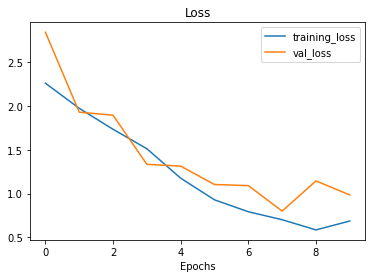

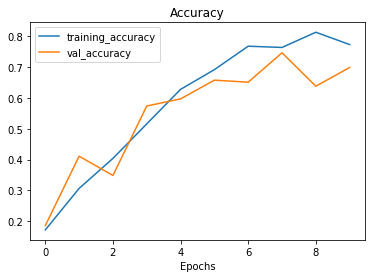

In [29]:
#Plot Model loss Curves
plot_loss_curves(history_10_percent_data_aug)

## Model3: Fine Tuning an existing model on the 10% of the 

In [30]:
#layers in model
model_2.layers

In [31]:
#How many layers are trainanble in our base model
print(len(model_2.layers[2].trainable_variables)) #layer at index 2 is the EfficientnetB0 layer

211


In [32]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 4,020,358
Non-tra

# Now to fine tune the base model to our own data, we are going to unfreeze the the top 10 layers and continue training our model for another 5 epochs. 

# This means all of the base model's layers except for the last 10 will remain frozen frozen and untrainable. And the weights in the remaining unforzen layers will be updated during training. 

In [33]:
#To begin fine-tuning,we'll unfreeze the entire base model by setting its trainable attribute to True
base_model.trainable=True

#Freeze all layers except for the 10
for layer in base_model.layers[:-10]:
  layer.trainable=False

#Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), #lower the learning rate 10x than before for fine tuning
                metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
#Check which layers are tuneable(trainable)
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number, layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [35]:
#Fine Tune for another 5 epochs
fine_tune_epochs=initial_epochs+5
history_fine_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                             epochs=fine_tune_epochs,
                                             validation_data=test_data,
                                             initial_epoch=history_10_percent_data_aug.epoch[-1], #start from previous last epoch
                                             validation_steps=int(0.25*len(test_data)),
                                             callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220630-154249
Epoch 10/15
24/24 [==============================] - 91s 3s/step - loss: 0.4088 - accuracy: 0.8707 - val_loss: 0.7408 - val_accuracy: 0.7714
Epoch 11/15
24/24 [==============================] - 146s 6s/step - loss: 0.2678 - accuracy: 0.9200 - val_loss: 0.8154 - val_accuracy: 0.7566
Epoch 12/15
24/24 [==============================] - 93s 4s/step - loss: 0.2494 - accuracy: 0.9147 - val_loss: 0.8238 - val_accuracy: 0.7582
Epoch 13/15
24/24 [==============================] - 90s 4s/step - loss: 0.2136 - accuracy: 0.9320 - val_loss: 0.8536 - val_accuracy: 0.7484
Epoch 14/15
24/24 [==============================] - 90s 4s/step - loss: 0.1832 - accuracy: 0.9440 - val_loss: 0.9313 - val_accuracy: 0.7484
Epoch 15/15
24/24 [==============================] - 87s 4s/step - loss: 0.1782 - accuracy: 0.9453 - val_loss: 0.9429 - val_accuracy: 0.7401


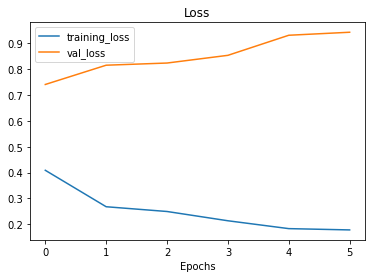

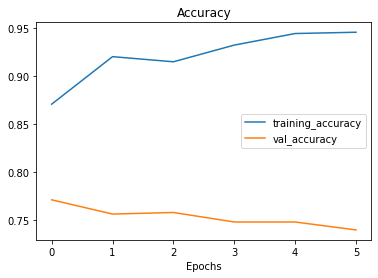

In [36]:
plot_loss_curves(history_fine_10_percent_data_aug)

# **Model 4: Fine Turning an existing model all of the Data**

In [37]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

unzip_data("10_food_classes_all_data.zip")

#Setup data Directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

--2022-06-30 15:56:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   142MB/s    in 3.5s    

2022-06-30 15:56:30 (141 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [38]:
#How many images are working with
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [39]:
#Setup data images
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                               label_mode="categorical",
                                                                               image_size=IMG_SIZE)
test_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                               label_mode="categorical",
                                                                               image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [40]:
model_2.evaluate(test_data)

79/79 [==============================] - 131s 2s/step - loss: 0.8873 - accuracy: 0.7572


[0.8872696161270142, 0.7572000026702881]

In [41]:
#load model from checkpoint that we can fine tune from the stage the 10 percent data model
model_2.load_weights(checkpoint_path) 

In [42]:
model_2.evaluate(test_data)

79/79 [==============================] - 134s 2s/step - loss: 0.9409 - accuracy: 0.7180


[0.940913200378418, 0.7179999947547913]

In [43]:
#Check which layers are tuneable in the whole model
for layer_number,layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)

In [44]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [46]:
#compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [48]:
#Continue to train and fine tune  the model to our data 
fine_tune_epochs=initial_epochs+5
history_fine_10_classes_full=model_2.fit(train_data_10_classes_full,
                                         epochs=fine_tune_epochs,
                                         initial_epoch=history_10_percent_data_aug.epoch[-1],
                                         validation_data=test_data,
                                         validation_steps=int(0.25*len(test_data)),
                                         callbacks=[create_tensorboard_callback("transfer_learning","full_10_classes_fine_tune_last_10")])



Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220630-160235
Epoch 10/15
235/235 [==============================] - 497s 2s/step - loss: 0.8686 - accuracy: 0.7277 - val_loss: 0.6281 - val_accuracy: 0.7961
Epoch 11/15
235/235 [==============================] - 483s 2s/step - loss: 0.7469 - accuracy: 0.7596 - val_loss: 0.5131 - val_accuracy: 0.8355
Epoch 12/15
235/235 [==============================] - 509s 2s/step - loss: 0.6908 - accuracy: 0.7773 - val_loss: 0.4847 - val_accuracy: 0.8536
Epoch 13/15
235/235 [==============================] - 484s 2s/step - loss: 0.6423 - accuracy: 0.7864 - val_loss: 0.4870 - val_accuracy: 0.8520
Epoch 14/15
235/235 [==============================] - 534s 2s/step - loss: 0.6121 - accuracy: 0.8001 - val_loss: 0.4957 - val_accuracy: 0.8339
Epoch 15/15
235/235 [==============================] - 462s 2s/step - loss: 0.5814 - accuracy: 0.8093 - val_loss: 0.4703 - val_accuracy: 0.8536


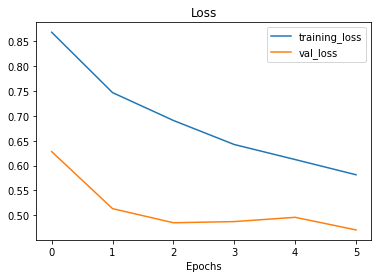

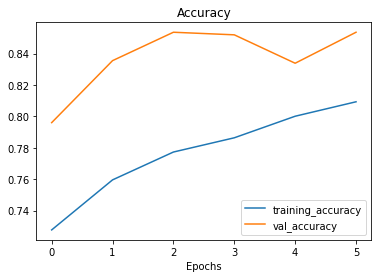

In [49]:
plot_loss_curves(history_fine_10_classes_full)